# Plotting training history for all CNN-related models

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
models_config = [
    ("CNN-2k", "saved_models/cnn/simple_model_2k_history.csv", "k"),
    # ("CNN-2k-ht", "saved_models/cnn/best_model_2k_history.csv", "k"),
    ("CNN-16k-ht", "saved_models/cnn/best_model_modified_16k_history.csv", "b"),
    ("CNN-ENb0", "saved_models/cnn_efficientnet/efficientnet0_16k_modified_model_history.csv", "g"),
    ("CNN-ENb3-ht", ("saved_models/cnn_efficientnet/best_en_16k_tuned_model_history.csv", "saved_models/cnn_efficientnet/best_en_16k_tuned_2x_model_history.csv"), "r"),
    ("CNN-EN-meta", "saved_models/cnn_metadata/cnn_efficientnetb0_metadata_model_history.csv", "y"),
]

In [3]:
%matplotlib inline
def plot_metric(var_to_plot, goal=None):
    fig = plt.figure(figsize=(10, 8))
    var_to_plot_val = "val_" + var_to_plot
    linewidth = 1
    alpha = 0.7
    max_epoch = 0
    for mname, mpath, color in models_config:
        if isinstance(mpath, tuple):
            df = pd.concat([pd.read_csv(p) for p in mpath]).reset_index()
        else:
            df = pd.read_csv(mpath)
        max_epoch = max(df.shape[0], max_epoch)

        plt.plot(df[var_to_plot], "-", label=mname+"-train", lw=linewidth, alpha=alpha, color=color)
        plt.plot(df[var_to_plot_val], "--", label=mname+"-val", lw=linewidth, alpha=alpha, color=color)

    # plot project goal
    if goal:
        plt.plot([-20, 1e4], [goal, goal], "c--", lw=linewidth)
        plt.text(max_epoch - 30, goal + 0.01, "project goal", color="c")
        
    plt.xlim(-5, max_epoch + 5)

    plt.xlabel("Epochs")
    plt.ylabel(var_to_plot)
    plt.legend()

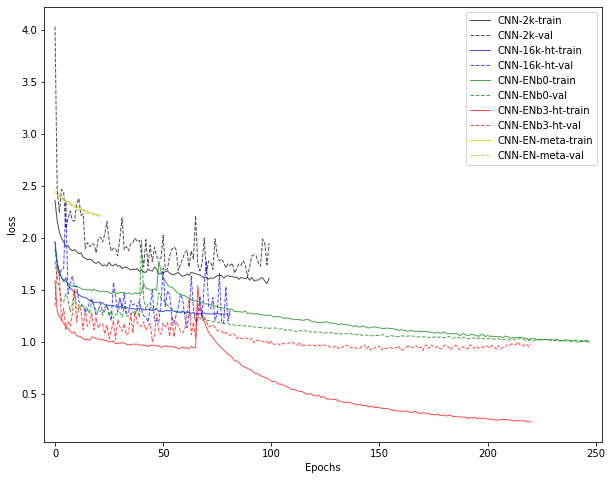

In [15]:
plot_metric("loss")

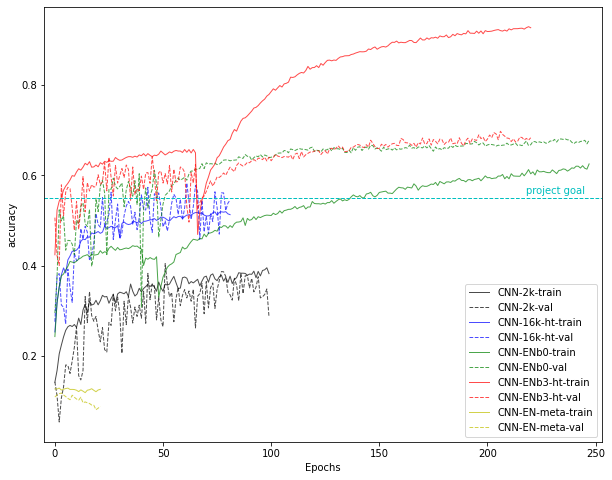

In [16]:
plot_metric("accuracy", 0.55)

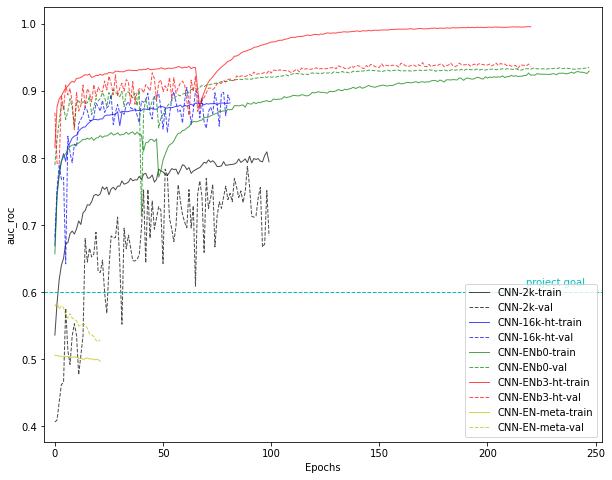

In [17]:
plot_metric("auc_roc", 0.6)

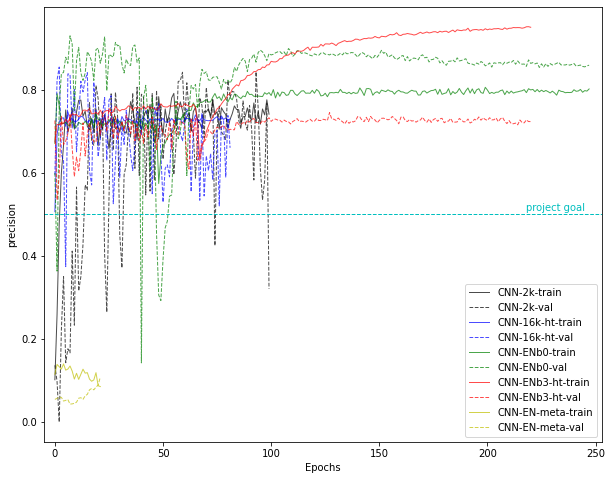

In [18]:
plot_metric("precision", 0.5)

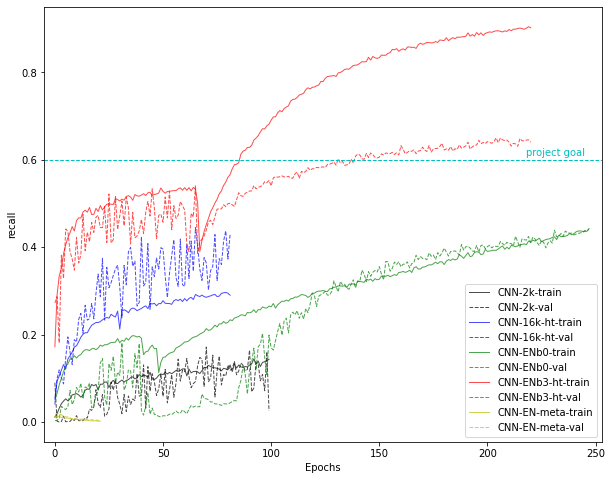

In [19]:
plot_metric("recall", 0.6)

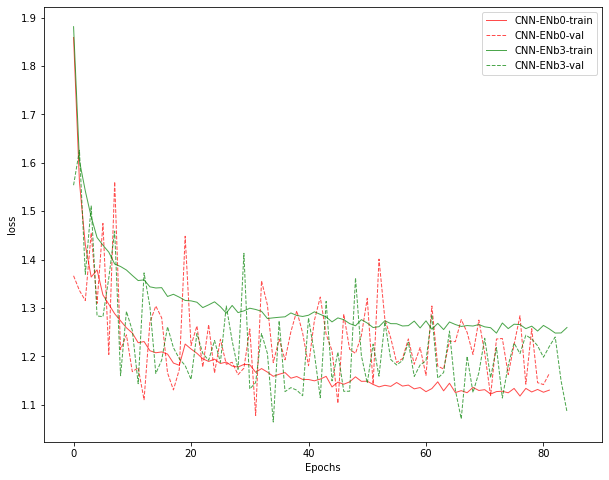

In [20]:
# Comparing EfficientNets only
models_config = [
    ("CNN-ENb0", "saved_models/cnn_efficientnet/discovery_EfficientNetB0_16k_history.csv", "r"),
    # ("CNN-ENb1", "saved_models/cnn_efficientnet/discovery_EfficientNetB1_16k_history.csv", "#ffa500"),
    # ("CNN-ENb2", "saved_models/cnn_efficientnet/discovery_EfficientNetB2_16k_history.csv", "y"),
    ("CNN-ENb3", "saved_models/cnn_efficientnet/discovery_EfficientNetB3_16k_history.csv", "g"),
    # ("CNN-ENb4", "saved_models/cnn_efficientnet/discovery_EfficientNetB4_16k_history.csv", "b"),
    # ("CNN-ENb5", "saved_models/cnn_efficientnet/discovery_EfficientNetB5_16k_history.csv", "#4b0082"),
    # ("CNN-ENb6", "saved_models/cnn_efficientnet/discovery_EfficientNetB6_16k_history.csv", "#ee82ee"),
    # ("CNN-ENb7", "saved_models/cnn_efficientnet/discovery_EfficientNetB7_16k_history.csv", "k"),
]
plot_metric("loss")
# plt.ylim(0.9, 2.2);